In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
# Exercise 10
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))
tr =  int(train_index.shape[0] * 0.8)
X_train, X_val, X_test = X[train_index[:tr]], X[train_index[tr:]],  X[test_index]
y_train, y_val, y_test = y[train_index[:tr]], y[train_index[tr:]], y[test_index]

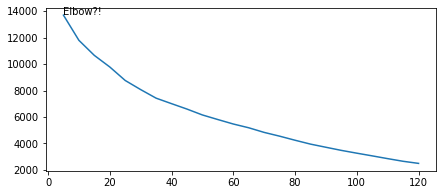

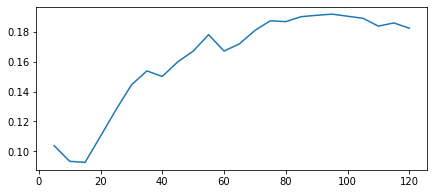

In [56]:
_x, _y, _y2 = [], [], []
for i in range(5, 121, 5):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_train)
    _x.append(i)
    _y.append(kmeans.inertia_)
    _y2.append(silhouette_score(X_train, kmeans.labels_))

plt.figure(figsize=(7,3))
plt.plot(_x, _y)
plt.annotate('Elbow?!', xy=(_x[0], _y[0]))

plt.figure(figsize=(7,3))
plt.plot(_x, _y2)
plt.show()

In [63]:
# Based on the above silhouette score chart above, the best score seems to be at 95
kmeans = KMeans(n_clusters=95, random_state=42).fit(X_train)
print(silhouette_score(X_train, kmeans.labels_))

0.19179714


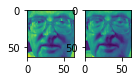

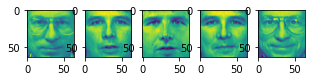

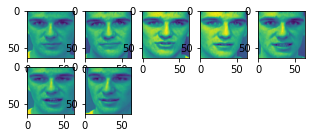

In [83]:
def print_cluster(cluster_id):
    cluster = np.where(kmeans.labels_ == cluster_id)[0]
    plt.figure(figsize=(5,5))
    for i, im in enumerate(X_train[ cluster ]):
        ax = plt.subplot(5,5,i+1)
        plt.imshow( im.reshape((64,64)) )

print_cluster(0)
print_cluster(5)
print_cluster(10)

In [ ]:
# Exercise 11